In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import os
import json
import spacy
import nltk
import emoji
import re
from PIL import Image

In [75]:
def filter_date(df,date_start,date_end):
    return df[(date_start <= df['date'])&
              (df['date'] <= date_end)]

def add_path(*args):
    return os.path.join(*map(str,args))

In [76]:
nlp = spacy.load("es_core_news_sm")

In [77]:
list_dfs = []
path= add_path('..','Data','EmpresaElectricaDeLaHabana')
d = len(os.listdir(path))-1
primer = 2022

for i in range(primer,primer+d):
    path_ = add_path(path,str(i))
    for j in os.listdir(path_):
        df = pd.read_json(add_path(path_,j))
        list_dfs.append(df)
    

In [78]:
df=pd.concat(list_dfs)

In [79]:
df.shape

(40239, 11)

In [80]:
df.head()

,text,sender_id,date,bot,views,message_id,is_reply,reply_to,reactions,total_reactions,photo_path
0,⚡️👷La principal causa de #interrupción eléctri...,-1001392909520,2022-11-30 22:52:06+00:00,NaN,8250,5493,False,NaN,"{'👍': 10, '🤬': 5}",15,NaN
1,"📌 Estimados clientes del municipio Playa,el co...",-1001392909520,2022-11-30 22:43:45+00:00,NaN,7803,5492,False,NaN,"{'🤬': 18, '👍': 4}",22,NaN
2,📌Disparo automático por frecuencia(DAF). Un di...,-1001392909520,2022-11-30 22:00:28+00:00,NaN,8062,5491,False,NaN,{'👍': 11},11,NaN
3,"📌 Estimados clientes ,el municipio San Miguel ...",-1001392909520,2022-11-30 21:58:51+00:00,NaN,7808,5490,False,NaN,{'👍': 9},9,NaN
4,"📌Estimados clientes del municipio Lisa,los con...",-1001392909520,2022-11-30 21:41:28+00:00,NaN,7983,5489,False,NaN,"{'👍': 9, '🤬': 5}",14,NaN


In [81]:
df['bot'].isnull().sum() == df.shape[0]

np.True_

In [82]:
df['reply_to'].isnull().sum() == df.shape[0]

np.False_

In [83]:
df.isnull().sum()

text                   0
sender_id              0
date                   0
bot                40239
views                  0
message_id             0
is_reply               0
reply_to           40116
reactions              0
total_reactions        0
photo_path         34298
dtype: int64

In [84]:
np.unique(df['sender_id'])

array([-1001392909520])

In [85]:

print('max',df['views'].max())
print('min: ',df['views'].min())


max 320625
min:  454


In [86]:
print('max',df['total_reactions'].max())
print('min: ',df['total_reactions'].min())


max 4345
min:  0


In [87]:
df = df.drop(columns=['bot'])

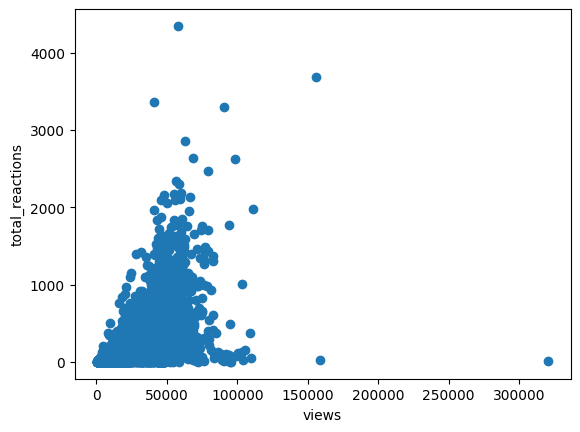

In [88]:
plt.scatter(df['views'],df['total_reactions'])
plt.xlabel("views")
plt.ylabel('total_reactions')
plt.show()

In [89]:
corr  = df[['views','total_reactions']].corr()
corr

,views,total_reactions
views,1.000000,0.559208
total_reactions,0.559208,1.000000


In [90]:
df['text'] = df['text'].str.lower()

In [91]:
df['date'] = pd.to_datetime(df['date'])

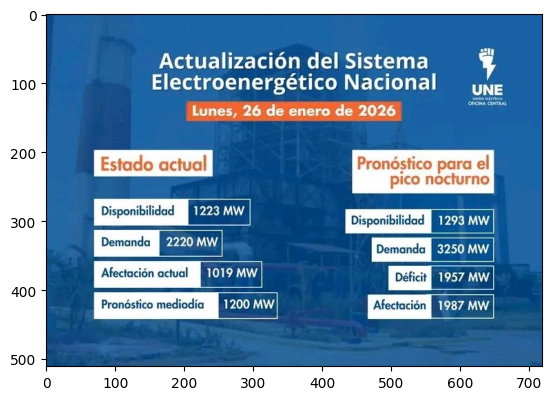

In [92]:

f=filter_date(df,'2026-01-01','2027-01-01')
d=f['text'].str.contains("actualización del sistema electroenergético nacional")



img = Image.open(add_path("..",f[d].reset_index()['photo_path'][0]))
img_arr=np.array(img)
plt.imshow(img_arr)